In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np     
import statistics as st
# for numerical computation

In [2]:
sns.set_palette("bright")

In [3]:
df = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv") 
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [4]:
df.shape

(10692, 13)

In [5]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [7]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


# Task---)Castro brazilia a real estate firm wishes to help people to choose an alternate city to relocate.

In [8]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [9]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].dtype== object:     
                                                   
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function


table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


In [10]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

In [11]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

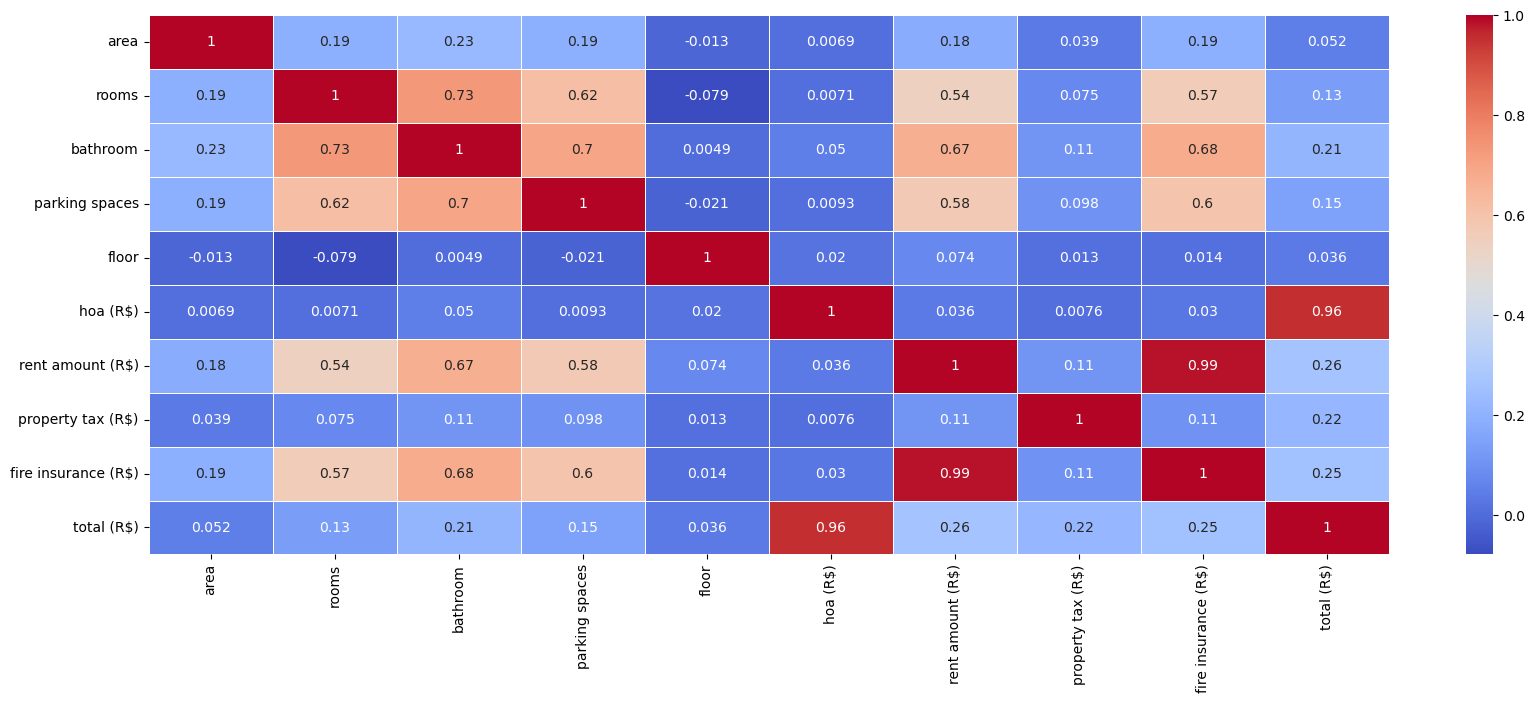

In [12]:
fig, ax=plt.subplots(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cbar=0.5, linewidth=0.5,cmap="coolwarm" )
plt.show()

# Criteria---
1. Bachelors---no of rooms will be less than 2 with single bathroom and rent should be less than 1000 and we can see for both furnished and non furnished homes.    

2. mid-size family---  no of rooms will be less equal to 6, with 2-3 bathrooms, parking spaces and animal aceptable or not and we can see for furnished and non furnished flats.

3. For larger families---- no of rooms must be greater than 6 and since old person will be there so will go for ground floor ,we will see for both furnished and non furished

# Sorting data for bachelors

In [13]:
df_bachelors = df.loc[ (df["rooms"]<=2) & (df["bathroom"]==1) ]

df_bachelors.shape

(3879, 13)

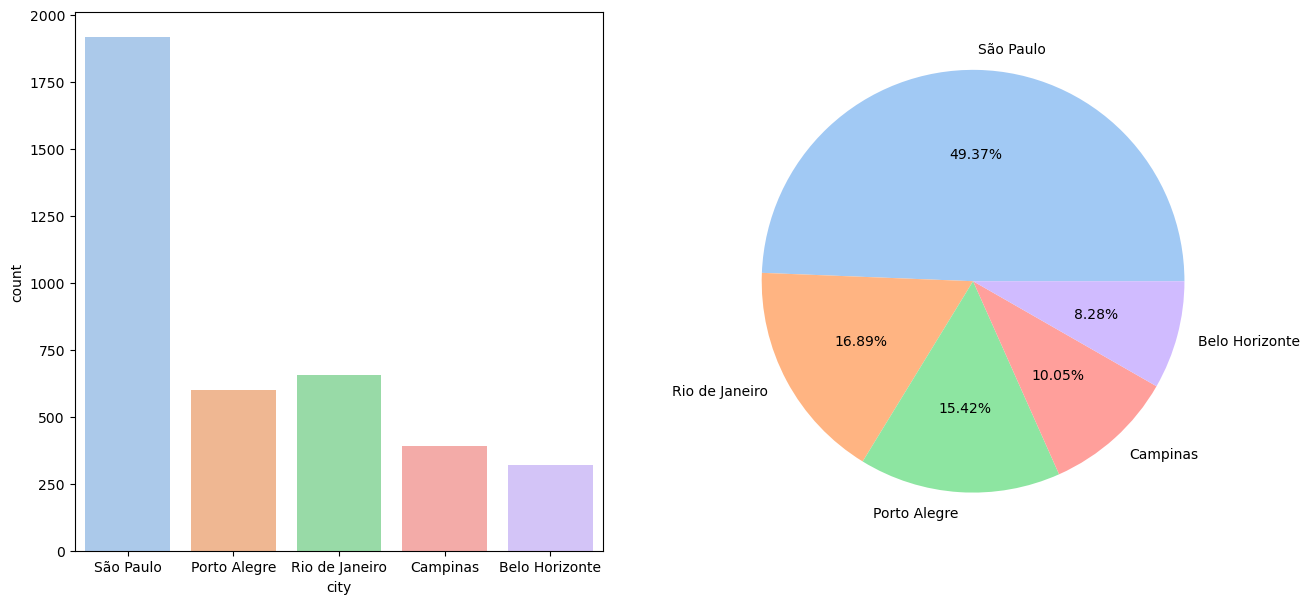

In [14]:
sns.set_palette("pastel")
fig, ax = plt.subplots(1,2, figsize = (15, 7))


percentage = df_bachelors["city"].value_counts()        
labels = list(df_bachelors["city"].value_counts().index)

sns.countplot(x = df_bachelors["city"], ax = ax[0])


plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

In [15]:
info_of_numerical("hoa (R$)")

The mean of the hoa (R$) is 1174.0216984661429
The median of the hoa (R$) is 560.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 15592.305248403356
Number of missing values in the hoa (R$) is 0


In [16]:

info_of_numerical("rent amount (R$)")

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.5455176710816
Number of missing values in the rent amount (R$) is 0


In [17]:
info_of_numerical("total (R$)")

The mean of the total (R$) is 5490.4869996258885
The median of the total (R$) is 3581.5
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 16484.72591235027
Number of missing values in the total (R$) is 0


In [18]:
d = pd.pivot_table(df_bachelors, index='city', values='rent amount (R$)', aggfunc=['mean', 'median', (lambda x: x.max() - x.min())])
d= d.rename(columns={"<lambda>": "Range"})
d

,mean,median,Range
,rent amount (R$),rent amount (R$),rent amount (R$)
city,,,
Belo Horizonte,1244.738318,1100.0,4050
Campinas,1148.325641,1000.0,4500
Porto Alegre,1298.824415,1156.5,4300
Rio de Janeiro,1777.254962,1540.0,11000
São Paulo,2199.301305,1800.0,23500


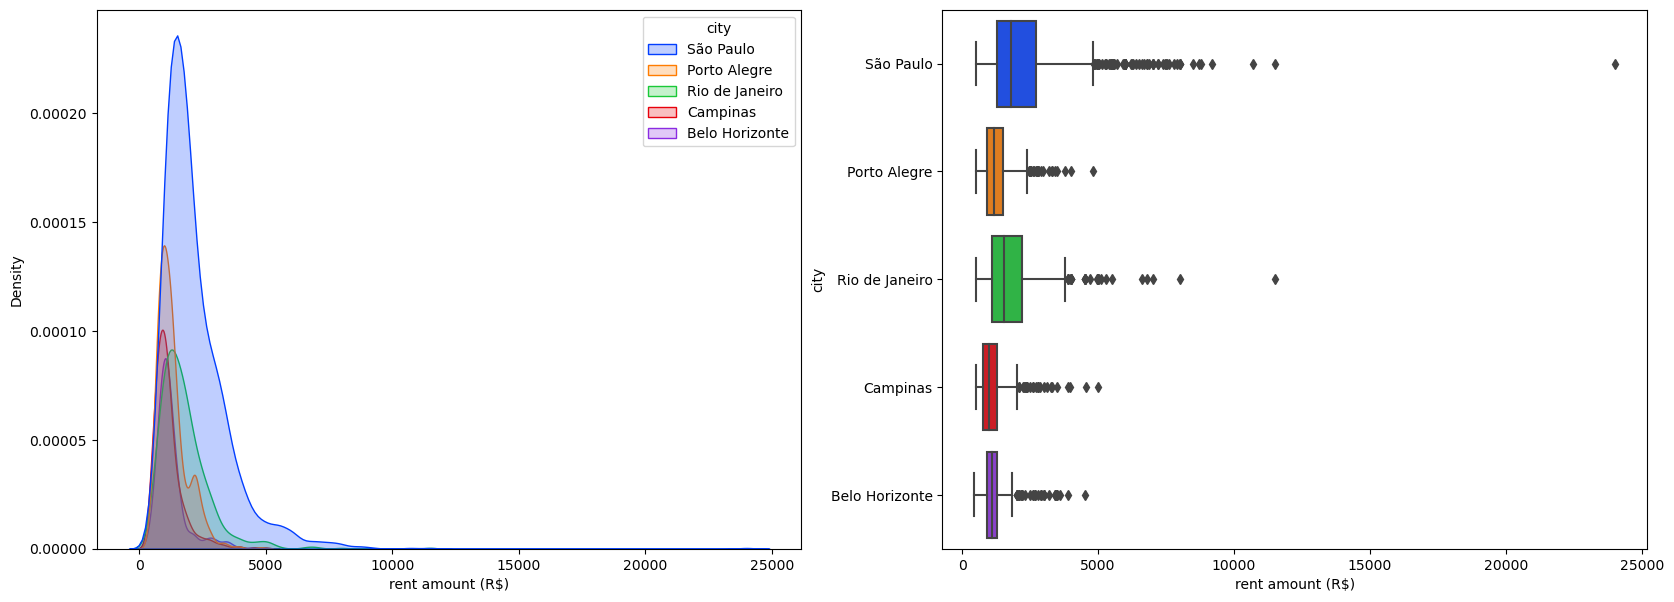

In [19]:
sns.set_palette("bright")
fig, ax=plt.subplots( 1,2,figsize=(20,7))
sns.kdeplot(hue="city", x="rent amount (R$)",data=df_bachelors, shade=True, ax=ax[0])
sns.boxplot(y="city", x="rent amount (R$)",data=df_bachelors, ax=ax[1])


plt.show()

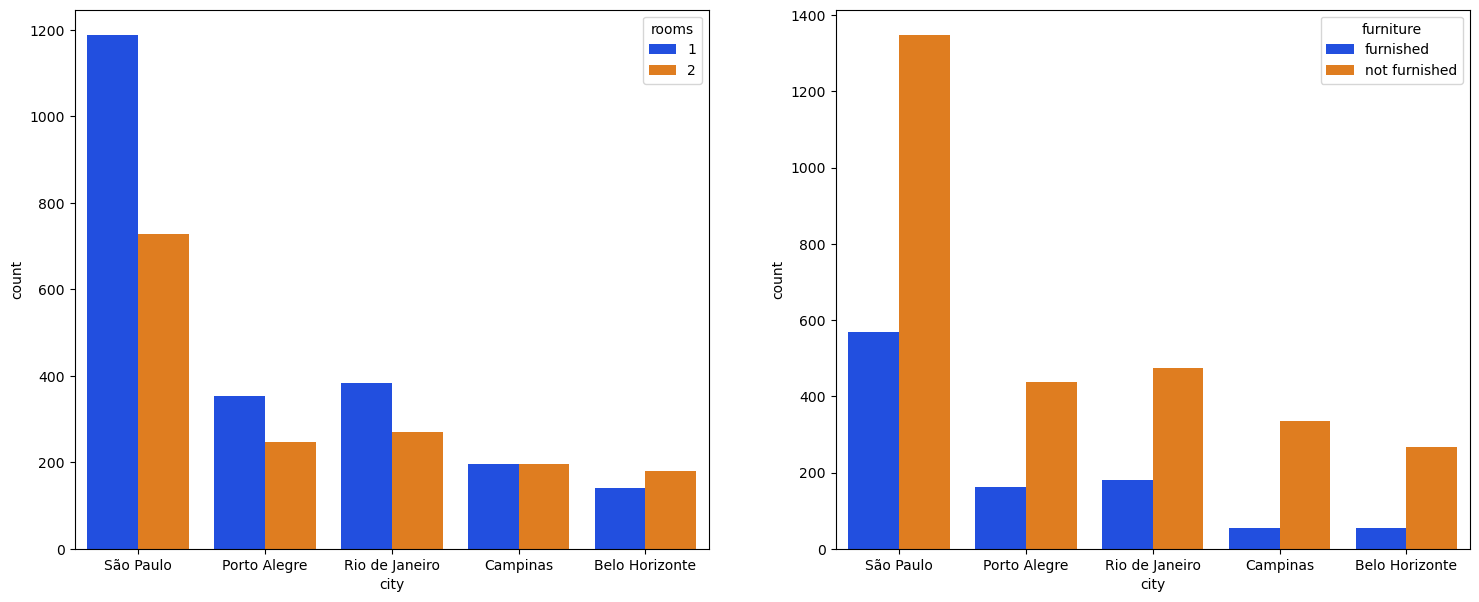

In [21]:
sns.set_palette("bright")
fig, ax=plt.subplots(1,2, figsize=(18,7))
sns.countplot(x="city", hue="rooms", data=df_bachelors, ax=ax[0])

sns.countplot(x="city", hue="furniture", data=df_bachelors, ax=ax[1])

plt.show()

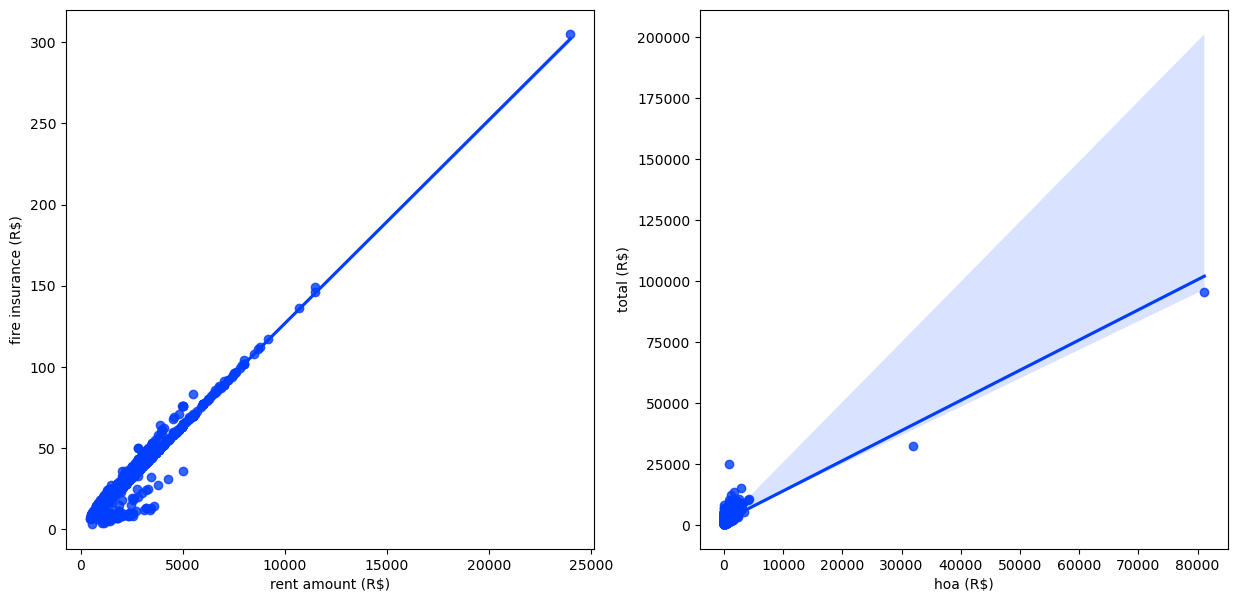

In [22]:
fig, ax=plt.subplots(1,2, figsize=(15,7))
sns.regplot(x="rent amount (R$)", y="fire insurance (R$)", ax=ax[0], data=df_bachelors )
sns.regplot(x="hoa (R$)", y="total (R$)", ax=ax[1], data=df_bachelors)
sns.set_palette("bright")
plt.show()

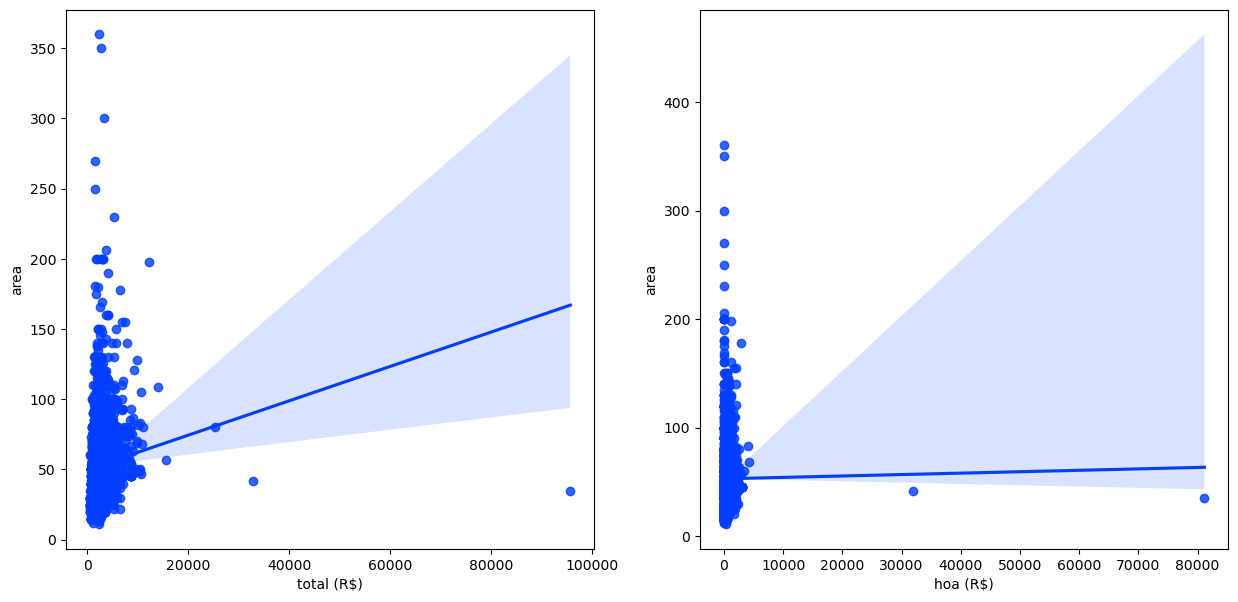

In [23]:
fig, ax=plt.subplots(1,2, figsize=(15,7))
sns.regplot(x="total (R$)", y="area", ax=ax[0], data=df_bachelors )
sns.regplot(x="hoa (R$)", y="area", ax=ax[1], data=df_bachelors)
sns.set_palette("bright")
plt.show()

# Interpretation--
1. The rent amount for different cities has mean greater than median and mode which shows the data is positively skewed, the majority of data is clustered around the lower end of the range. Greater value of mean is due to outliers.
2. There are outliers for each city which shows that, for the same requirements for furnished and nonfurnished the rent and total amount to be paid is different. 
3. Outlier treatment will not be suggested here otherwise we will lose the data for furnished and nonfurnished.

# Result--

For bachelors porto algere city coming out as a possible place to relocate . As it has more number of flats as compared to other cities and for both furnished and nonfurnished categories. It has good animal acceptance also.

# Sorting the data for mid size family requirements


1. no of rooms >2
2. no of bathrooms <=3

In [24]:
df_s_family=df.loc[ ( df["rooms"]>=3) & (df["bathroom"]<=3)]
print( "total_no_of_rows--",df_s_family.shape)


total_no_of_rows-- (3306, 13)


In [33]:
df_s_family=df.loc[ ( df["rooms"]>=3) & (df["bathroom"]<=3)]
print( "total_no_of_rows--",df_s_family.shape)
df_s_family

total_no_of_rows-- (3306, 13)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
22,São Paulo,160,3,2,2,18,acept,furnished,1530,1900,167,25,3622
24,Rio de Janeiro,90,3,2,1,7,acept,not furnished,800,1800,118,24,2742
28,Campinas,208,3,2,4,0,acept,not furnished,0,3180,100,48,3328
37,Belo Horizonte,80,3,2,1,0,acept,not furnished,0,11000,425,181,11610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10675,Rio de Janeiro,250,3,2,1,11,acept,not furnished,2000,2700,500,35,5235
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419
10685,São Paulo,83,3,2,2,11,acept,not furnished,888,7521,221,96,8726
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670


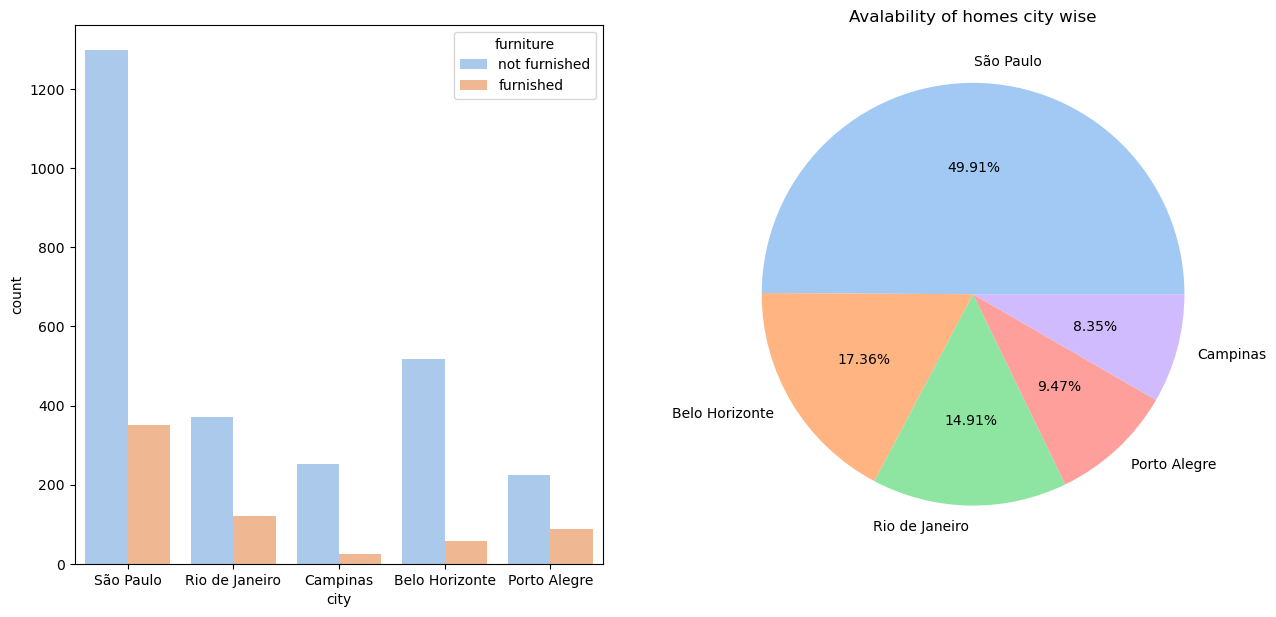

In [34]:
sns.set_palette("pastel")
fig, ax = plt.subplots(1,2, figsize = (15, 7))
ax[1].set_title("Avalability of homes city wise")
percentage = df_s_family["city"].value_counts()        
labels = list(df_s_family["city"].value_counts().index)
sns.countplot(x = df_s_family["city"],hue= df_s_family["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()


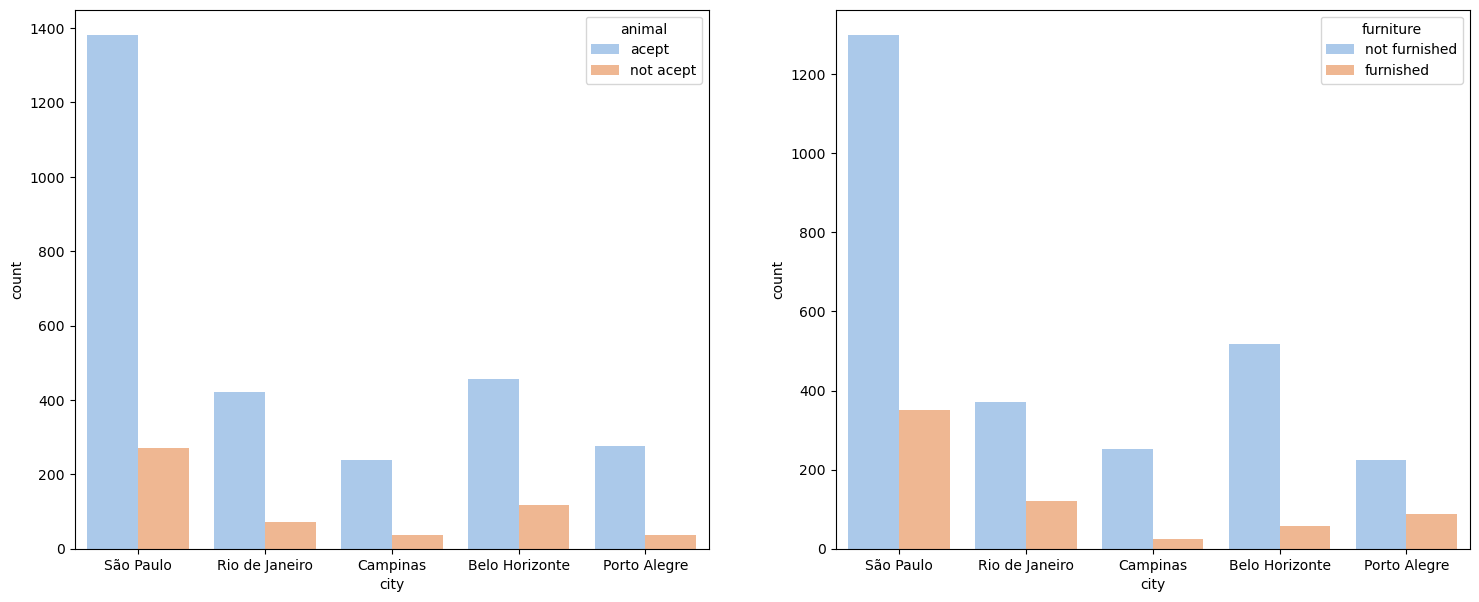

In [35]:
fig, ax=plt.subplots(1,2, figsize=(18,7))
sns.countplot(x="city", hue="animal", data=df_s_family, ax=ax[0])

sns.countplot(x="city", hue="furniture", data=df_s_family, ax=ax[1])

plt.show()

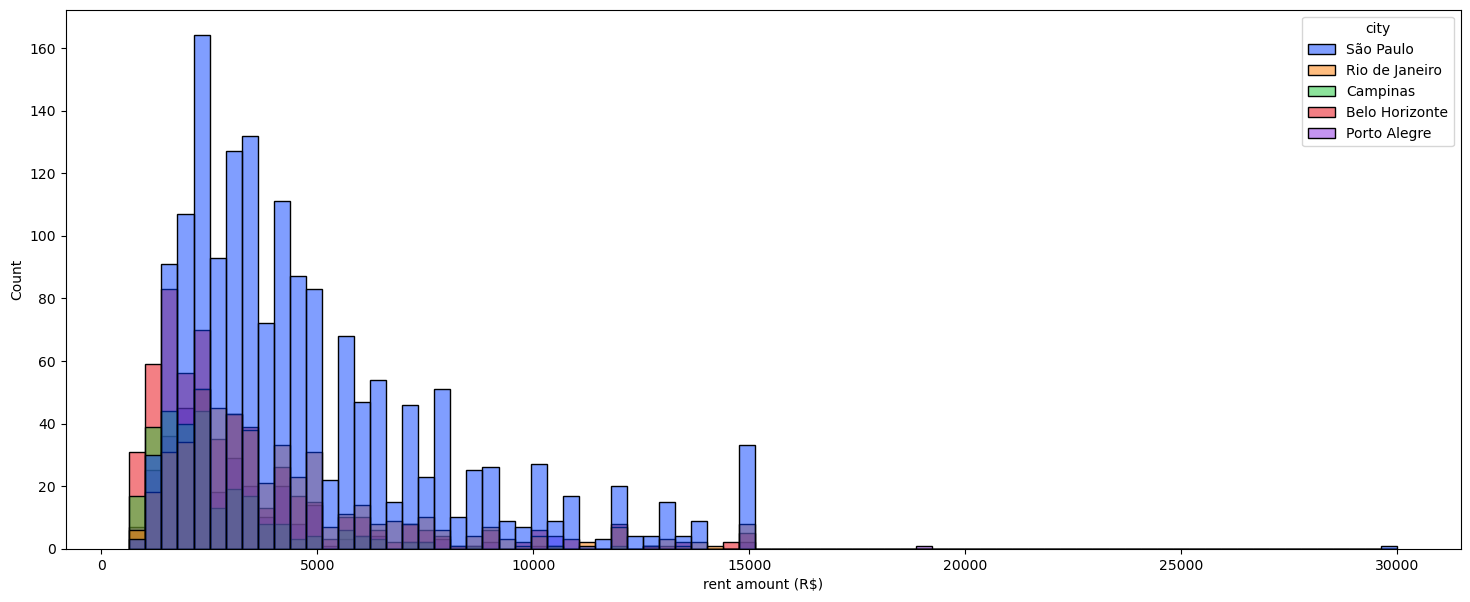

In [38]:
fig, ax=plt.subplots( figsize=(18,7))
sns.histplot(hue="city", x="rent amount (R$)",data=df_s_family)

sns.set_palette("bright")
plt.show()

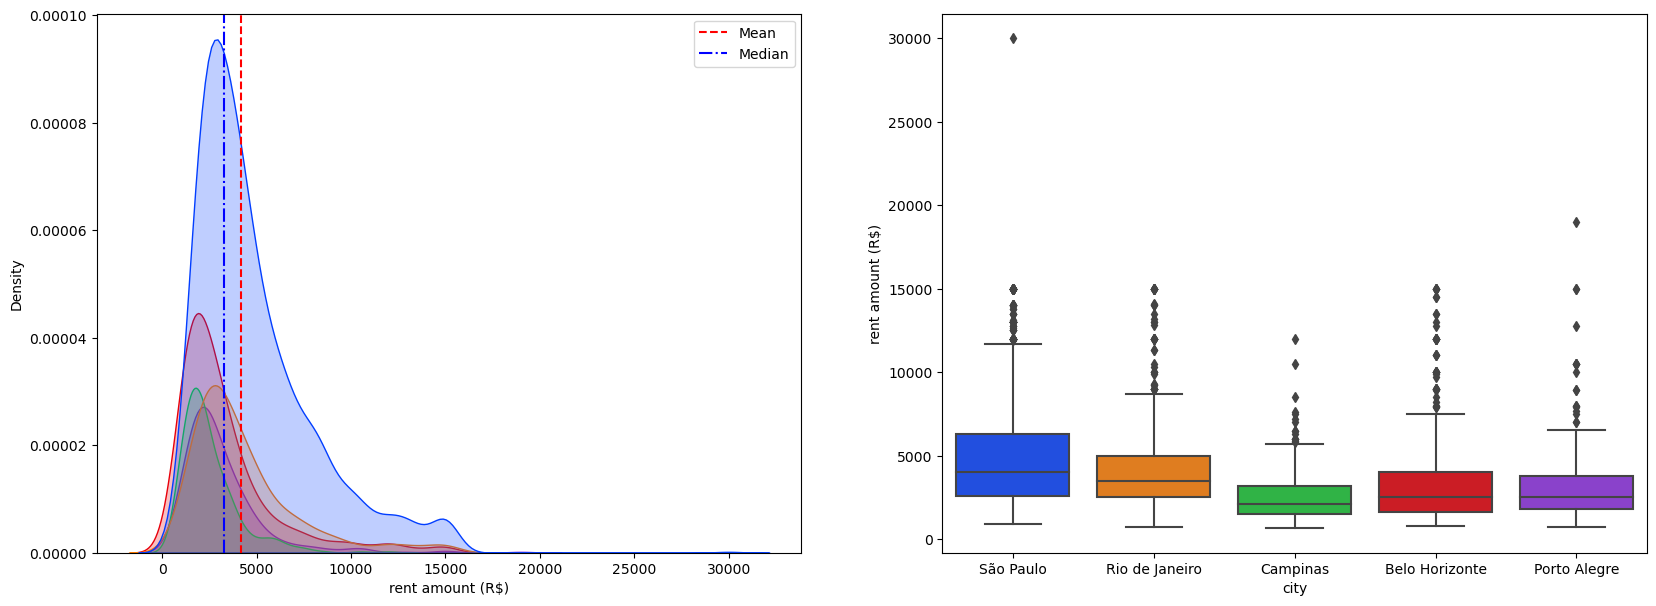

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.set_palette("bright")
# Plot KDE with mean and median lines
sns.kdeplot(hue="city", x="rent amount (R$)", data=df_s_family, shade=True, ax=ax[0], legend=True)
ax[0].axvline(df_s_family["rent amount (R$)"].mean(), color='r', linestyle='--', label='Mean')
ax[0].axvline(df_s_family["rent amount (R$)"].median(), color='b', linestyle='-.', label='Median')
ax[0].legend()

# Plot boxplot
sns.boxplot(x="city", y="rent amount (R$)", data=df_s_family, ax=ax[1])

plt.show()

In [39]:
d1 = pd.pivot_table(df_s_family, index='city', values='total (R$)', aggfunc=['mean', 'median', 'std', (lambda x: x.max() - x.min())])
d1= d1.rename(columns={"<lambda>": "Range"})
d1

,mean,median,std,Range
,total (R$),total (R$),total (R$),total (R$)
city,,,,
Belo Horizonte,4150.954704,3232.5,3085.121869,18797
Campinas,3416.764493,2985.0,1912.584631,11718
Porto Alegre,3994.453674,3370.0,2467.104416,18979
Rio de Janeiro,6108.148073,5159.0,3641.925698,18925
São Paulo,6462.515758,5303.0,3938.564462,29690


In [40]:
e1 = pd.pivot_table(df_s_family, index='city', values='property tax (R$)', aggfunc=['mean', 'median', 'std', (lambda x: x.max() - x.min())])
e1= e1.rename(columns={"<lambda>": "Range"})
e1

,mean,median,std,Range
,property tax (R$),property tax (R$),property tax (R$),property tax (R$)
city,,,,
Belo Horizonte,231.506969,172.0,212.814594,1667
Campinas,167.347826,119.5,166.888472,1500
Porto Alegre,194.287540,117.0,369.344829,4500
Rio de Janeiro,343.929006,258.0,407.640032,5404
São Paulo,400.949091,283.0,449.609613,5000


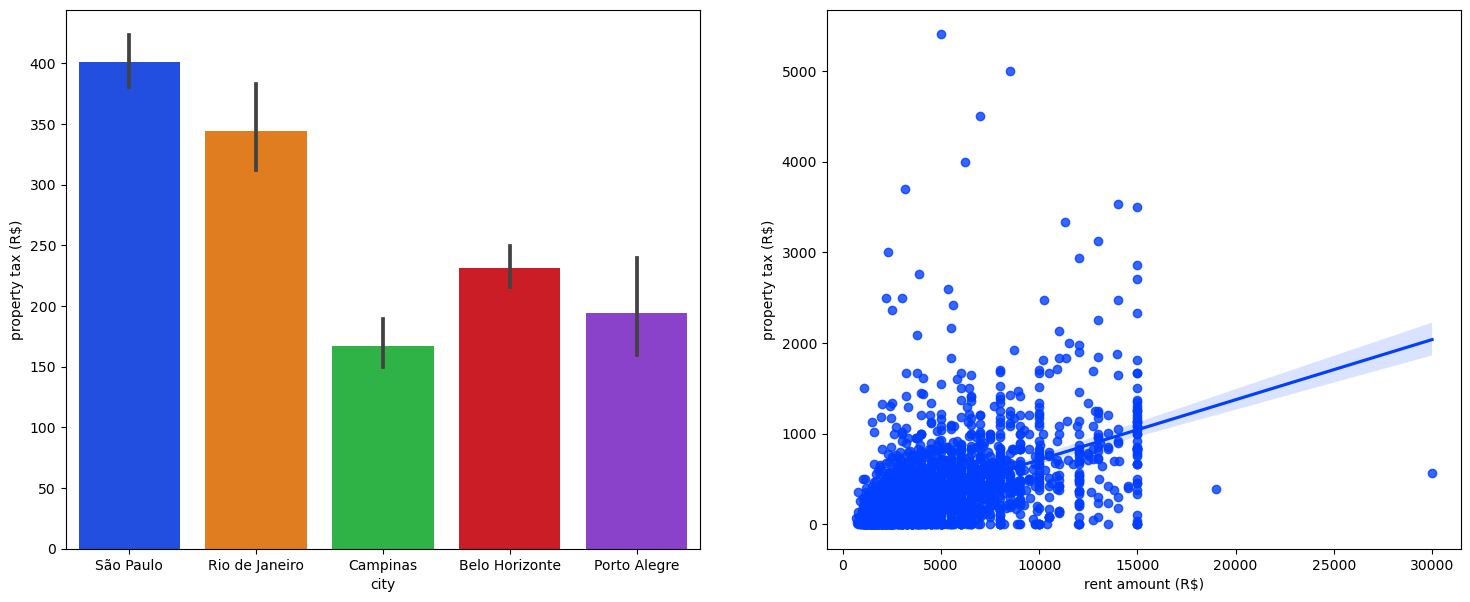

In [41]:

fig, ax=plt.subplots(1,2, figsize=(18,7))
sns.regplot(x="rent amount (R$)", y="property tax (R$)", ax=ax[1], data=df_s_family, )
sns.barplot(y="property tax (R$)",x ="city", data=df_s_family, ax=ax[0], )
plt.show()

<AxesSubplot:xlabel='city', ylabel='hoa (R$)'>

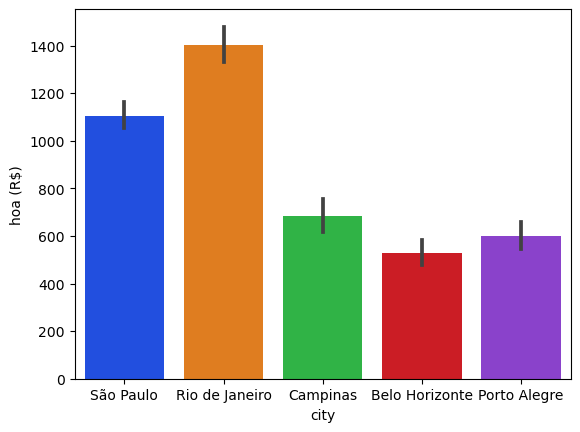

In [42]:
sns.barplot(y="hoa (R$)",x ="city", data=df_s_family )

# Interpretation---
1. The mean value for rent amount, hoa, total amt is greater than the median value , but the range of rent amt for mid-size-family is very high which shows that with increase in area or number of rooms and whether a flat is furnished or not, total amount needs to be paid increases.

2. Majority of data is concertrated between 1000 to 5000 approx for total amount , belo horizonte and porto alegre are expensive cities since we are getting more number of values. 

if a person wants to pay less and want a home for his family he can choose belo horizonte city which has a lot of non furnished flats and is animal friendly also and can chose from a wide range of prices.

# Sorting the data for larger families

1. rooms >=5
2. bathrooms >=3

In [43]:
df_l_family = df.loc[ ( df["rooms"]>=5) & (df["bathroom"]>=3)]
df_l_family.shape

(375, 13)

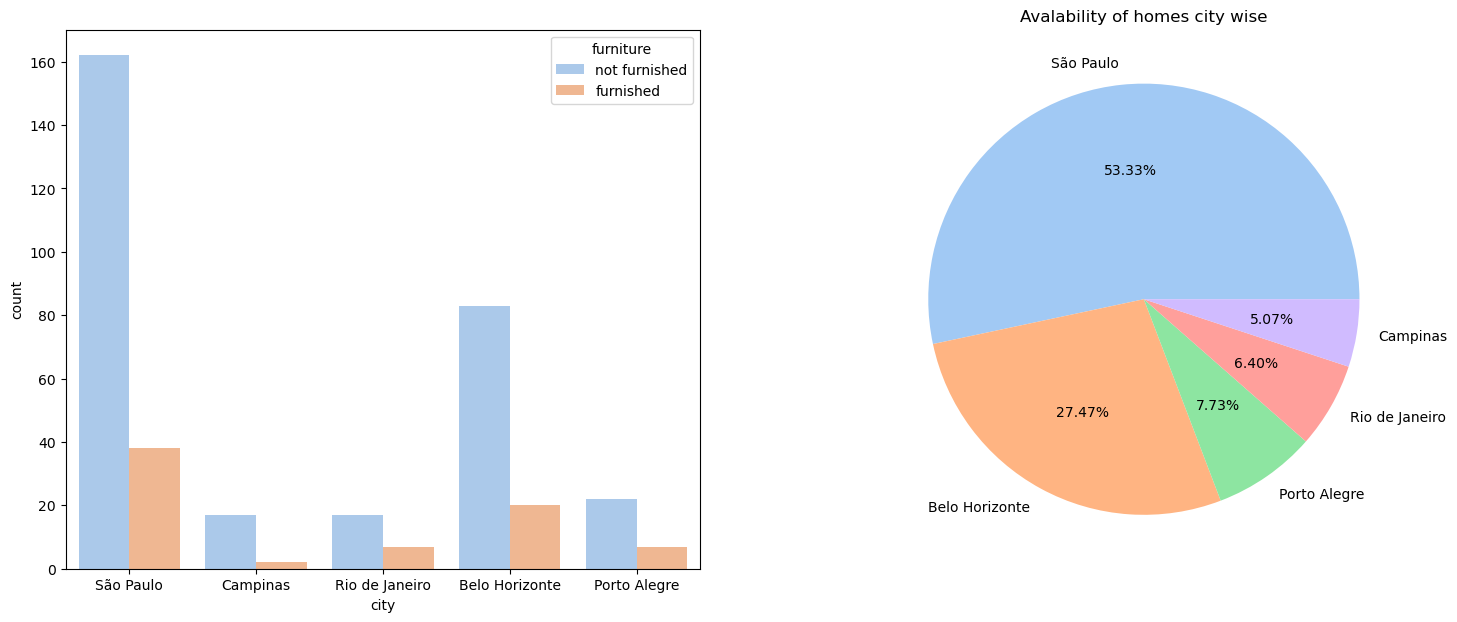

In [44]:
sns.set_palette("pastel")
fig, ax = plt.subplots(1,2, figsize = (18, 7))
ax[1].set_title("Avalability of homes city wise")
percentage = df_l_family["city"].value_counts()        
labels = list(df_l_family["city"].value_counts().index)
sns.countplot(x = df_l_family["city"],hue=df_l_family["furniture"], ax = ax[0])

plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

In [45]:
d2 = pd.pivot_table(df_l_family, index='city', values='property tax (R$)', aggfunc=['mean', 'median', 'std', (lambda x: x.max() - x.min())])
d2= d2.rename(columns={"<lambda>": "Range"})
d2

,mean,median,std,Range
,property tax (R$),property tax (R$),property tax (R$),property tax (R$)
city,,,,
Belo Horizonte,653.485437,487.0,545.426922,3000
Campinas,589.736842,500.0,339.511551,1200
Porto Alegre,346.827586,300.0,314.068813,1250
Rio de Janeiro,950.041667,822.5,879.605321,4241
São Paulo,1396.850000,1084.0,1345.307347,9500


In [46]:
d3 = pd.pivot_table(df_l_family, index='city', values='total (R$)', aggfunc=['mean', 'median',  (lambda x: x.max() - x.min())])
d3= d3.rename(columns={"<lambda>": "Range"})
d3

,mean,median,Range
,total (R$),total (R$),total (R$)
city,,,
Belo Horizonte,9454.582524,8560,23072
Campinas,8639.578947,8746,14434
Porto Alegre,7446.137931,6501,12167
Rio de Janeiro,11772.791667,11100,19362
São Paulo,12833.650000,10620,229963


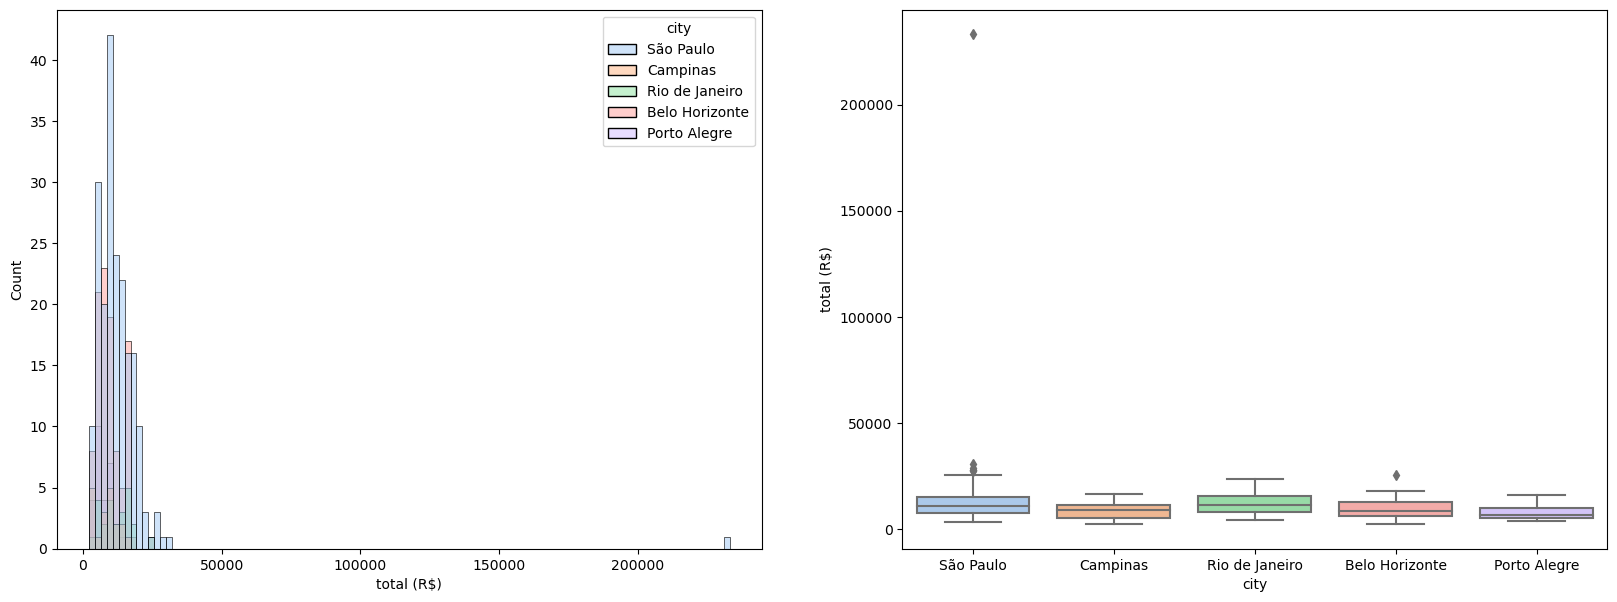

In [47]:

fig, ax = plt.subplots(1,2,figsize = (20, 7))

sns.histplot(hue = "city", x= "total (R$)", data = df_l_family,  ax=ax[0])
sns.boxplot(x = "city", y= "total (R$)", data = df_l_family, ax=ax[1])

plt.show()

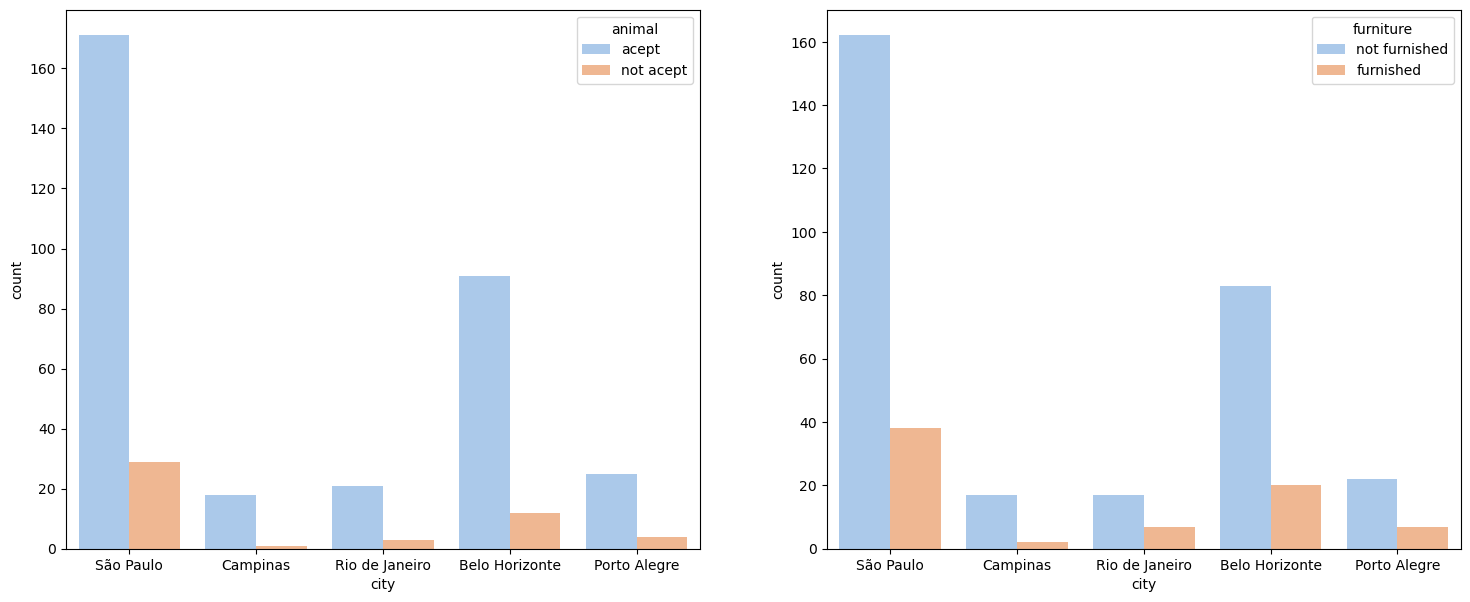

In [48]:
fig, ax=plt.subplots(1,2, figsize=(18,7))
sns.countplot(x="city", hue="animal", data=df_l_family, ax=ax[0])

sns.countplot(x="city", hue="furniture", data=df_l_family, ax=ax[1])

plt.show()

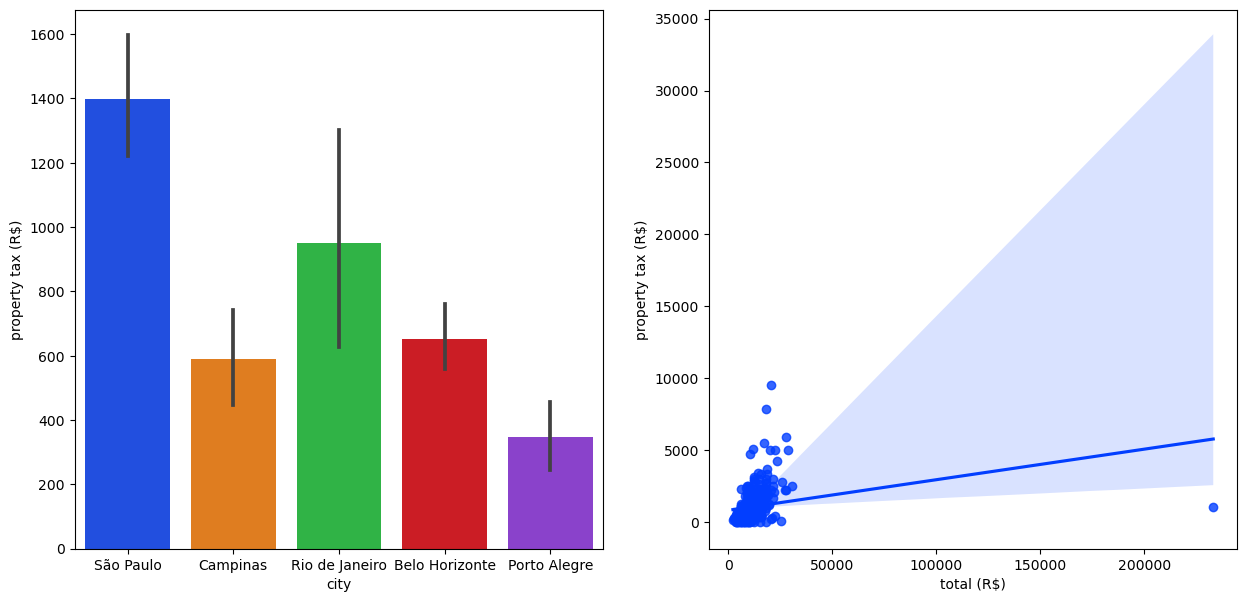

In [49]:
sns.set_palette("bright")
fig, ax=plt.subplots(1,2, figsize=(15,7))
sns.barplot(y="property tax (R$)",x ="city", data=df_l_family, ax=ax[0], )
sns.regplot(x="total (R$)", y="property tax (R$)", ax=ax[1], data=df_l_family)
plt.show()

# Interpretation---
The data for total amount for all the 2 cities is well distributed. the concerntration of data for porto alegre is positively skewed. 
The belo horizonte city has more number of flats that are not furnished and are animal friendly also. 

It provides more opportunity to chose between a range of prices, may be family is able to afford a big house in one of these cities which it was not able to do earlier.  

# Result----

For bachelors the requirement is less in terms of rooms and less expensive flats will be desirable. for that porto alegre city is a better choice as compared to other cities because of the availablity of flats is more as compared to others.

For mid-size and large family homes, belo horizonte city is preferred as compared to others because it has more number of houses , range of prices to chose from and animal friendly also.